<a href="https://colab.research.google.com/github/esadhipars/BENGKOD/blob/main/UAS_BENGKOD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tahap 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/projek bengkod/ObesityDataSet.csv')
print("Jumlah baris dan kolom:", df.shape)

Jumlah baris dan kolom: (2111, 17)


In [4]:
#Tampilkan beberapa baris pertama dataset
print("Preview Data:")
display(df.head())

Preview Data:


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
#Informasi umum dataset
print("\nInfo Dataset:")
df.info()


Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2

In [6]:
#Statistik deskriptif untuk data numerik
print("\nDeskripsi Statistik:")
display(df.describe())


Deskripsi Statistik:


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2097,2102,2099,2100,2106,2100,2103,2099,2101,2106,2105,2098,2103,2102,2100,2105,2111
unique,1394,3,1562,1518,5,3,808,637,3,3,1263,3,1186,1130,5,6,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351


In [7]:
#Cek jumlah missing value
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Age                               14
Gender                             9
Height                            12
Weight                            11
CALC                               5
FAVC                              11
FCVC                               8
NCP                               12
SCC                               10
SMOKE                              5
CH2O                               6
family_history_with_overweight    13
FAF                                8
TUE                                9
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64


In [8]:
#Cek jumlah nilai unik tiap kolom
print("\nUnique Values per Column:")
print(df.nunique())


Unique Values per Column:
Age                               1394
Gender                               3
Height                            1562
Weight                            1518
CALC                                 5
FAVC                                 3
FCVC                               808
NCP                                637
SCC                                  3
SMOKE                                3
CH2O                              1263
family_history_with_overweight       3
FAF                               1186
TUE                               1130
CAEC                                 5
MTRANS                               6
NObeyesdad                           7
dtype: int64


In [9]:
#Cek data duplikat
print("\nJumlah Data Duplikat:")
print(df.duplicated().sum())


Jumlah Data Duplikat:
18


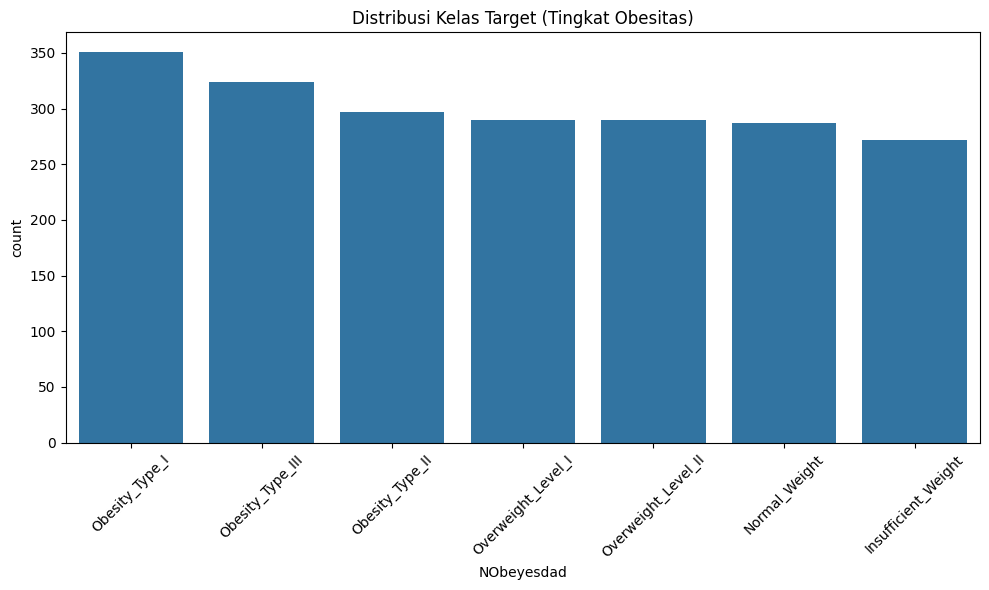

In [10]:
#Distribusi label target
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='NObeyesdad', order=df['NObeyesdad'].value_counts().index)
plt.title('Distribusi Kelas Target (Tingkat Obesitas)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

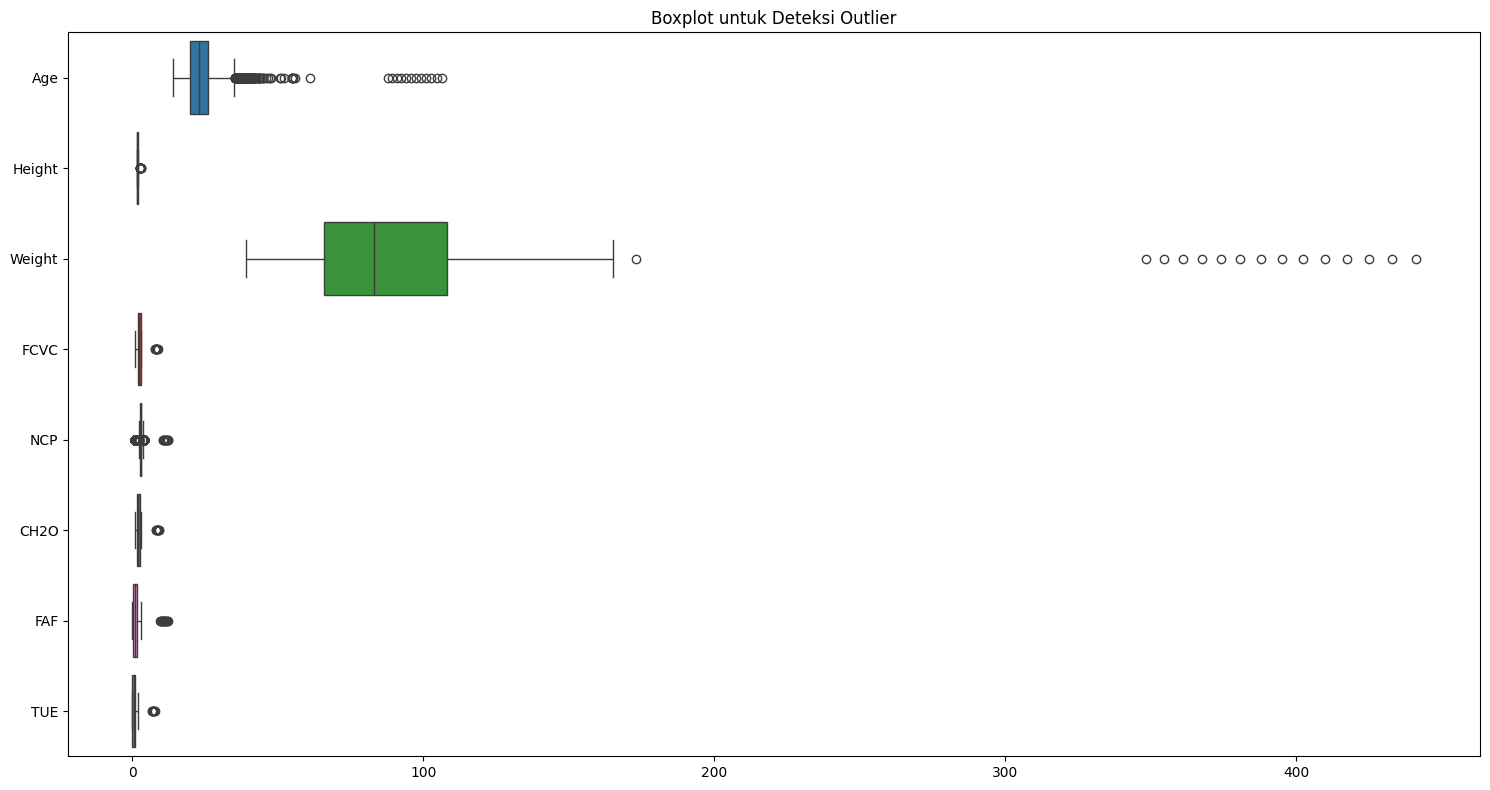

In [11]:
#Deteksi Outlier dengan Boxplot
# Ubah kolom numerik dari object ke float jika perlu
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(15, 8))
sns.boxplot(data=df[numeric_cols], orient='h')
plt.title("Boxplot untuk Deteksi Outlier")
plt.tight_layout()
plt.show()

#Tahap 2

In [12]:
#Cek dan tangani missing values
print("\nMissing values:")
print(df.isnull().sum())
df.dropna(inplace=True)


Missing values:
Age                               22
Gender                             9
Height                            22
Weight                            19
CALC                               5
FAVC                              11
FCVC                              18
NCP                               22
SCC                               10
SMOKE                              5
CH2O                              15
family_history_with_overweight    13
FAF                               19
TUE                               15
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64


In [13]:
#Tangani duplikasi data
print("\nJumlah duplikat:", df.duplicated().sum())
df.drop_duplicates(inplace=True)


Jumlah duplikat: 18


In [14]:
#tangani outlier dengan Z-Score (threshold > 3)
numerik = df.select_dtypes(include=np.number).columns
z_scores = np.abs(stats.zscore(df[numerik]))
df = df[(z_scores < 3).all(axis=1)]
print("\nJumlah data setelah outlier dihapus:", df.shape)


Jumlah data setelah outlier dihapus: (1780, 17)


In [15]:
#Encode data kategorikal
categorical = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in categorical:
    df[col] = le.fit_transform(df[col])
print("\nContoh data setelah encoding:")
print(df.head())


Contoh data setelah encoding:
    Age  Gender  Height  Weight  CALC  FAVC  FCVC  NCP  SCC  SMOKE  CH2O  \
0  21.0       1    1.62    64.0     4     1   2.0  3.0    1      1   2.0   
1  21.0       1    1.52    56.0     3     1   3.0  3.0    2      2   3.0   
2  23.0       2    1.80    77.0     2     1   2.0  3.0    1      1   2.0   
3  27.0       2    1.80    87.0     2     1   3.0  3.0    1      1   2.0   
4  22.0       2    1.78    89.8     3     1   2.0  1.0    1      1   2.0   

   family_history_with_overweight  FAF  TUE  CAEC  MTRANS  NObeyesdad  
0                               2  0.0  1.0     3       4           1  
1                               2  3.0  0.0     3       4           1  
2                               2  2.0  1.0     3       4           1  
3                               1  2.0  0.0     3       5           5  
4                               1  0.0  0.0     3       4           6  


<ipython-input-15-630420692>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-15-630420692>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-15-630420692>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

In [16]:
#Cek korelasi untuk feature selection
correlation = df.corr()['NObeyesdad'].abs().sort_values(ascending=False)
print("\nKorelasi terhadap target:")
print(correlation)


Korelasi terhadap target:
NObeyesdad                        1.000000
Weight                            0.390114
family_history_with_overweight    0.327944
CAEC                              0.300379
Age                               0.231630
FAF                               0.125796
CALC                              0.120304
CH2O                              0.094173
NCP                               0.083193
TUE                               0.060254
FAVC                              0.059374
SCC                               0.043850
Height                            0.037553
FCVC                              0.032750
MTRANS                            0.030740
SMOKE                             0.020570
Gender                            0.017765
Name: NObeyesdad, dtype: float64


In [17]:
#Pisahkan fitur dan target
X = df.drop(columns='NObeyesdad')
y = df['NObeyesdad']

In [18]:
#Tangani imbalance data dengan SMOTE
print("\nSebelum SMOTE:")
print(y.value_counts())
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X, y)
print("\nSetelah SMOTE:")
print(pd.Series(y_sm).value_counts())


Sebelum SMOTE:
NObeyesdad
2    313
4    275
3    251
1    246
5    237
6    230
0    228
Name: count, dtype: int64

Setelah SMOTE:
NObeyesdad
1    313
5    313
6    313
2    313
0    313
3    313
4    313
Name: count, dtype: int64


In [19]:
#Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sm)


In [20]:
#Gabungkan kembali ke DataFrame akhir
df_final = pd.DataFrame(X_scaled, columns=X.columns)
df_final['NObeyesdad'] = y_sm

# Kesimpulan Tahap Preprocessing

1.Data dikonversi ke tipe numerik dan missing value sudah ditangani.

2.Ketidakseimbangan kelas ditangani menggunakan SMOTE.

3.Data dinormalisasi menggunakan StandardScaler.

4.Dataset siap digunakan untuk proses modeling pada tahap berikutnya.

# Tahap 3

In [21]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Model 1: Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
# Model 2: Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [24]:
# Model 3: SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [25]:
# Evaluasi
for name, y_pred in zip(['Logistic Regression', 'Random Forest', 'SVM'], [y_pred_lr, y_pred_rf, y_pred_svm]):
    print(f"\nModel: {name}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))


Model: Logistic Regression
[[49  5  0  0  0  0  0]
 [ 8 33  2  0  0  5  2]
 [ 0  0 47  1  1  0  3]
 [ 0  0  0 52  0  0  0]
 [ 0  0  0  0 66  0  0]
 [ 0  3  5  0  0 24  6]
 [ 0  3  6  3  0  4 28]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.88        54
           1       0.75      0.66      0.70        50
           2       0.78      0.90      0.84        52
           3       0.93      1.00      0.96        52
           4       0.99      1.00      0.99        66
           5       0.73      0.63      0.68        38
           6       0.72      0.64      0.67        44

    accuracy                           0.84       356
   macro avg       0.82      0.82      0.82       356
weighted avg       0.83      0.84      0.84       356


Model: Random Forest
[[51  3  0  0  0  0  0]
 [ 1 45  0  0  0  3  1]
 [ 0  0 51  0  0  0  1]
 [ 0  0  0 52  0  0  0]
 [ 0  0  0  0 66  0  0]
 [ 0  6  0  0  0 32  0]
 [ 0  2  0  1  0  2 39]]
              p

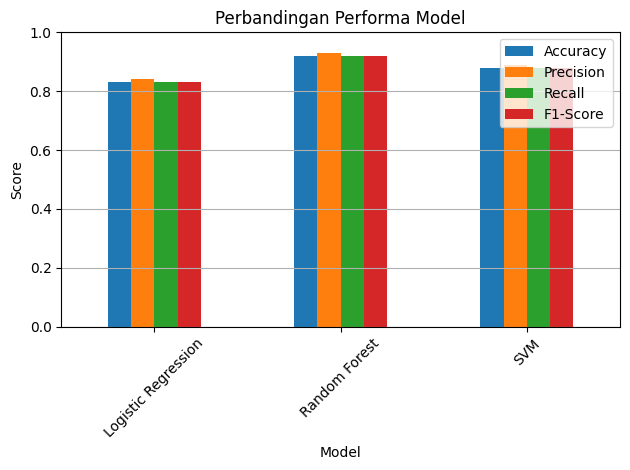

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Misal hasil evaluasi (berupa dictionary atau DataFrame)
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'SVM'],
    'Accuracy': [0.83, 0.92, 0.88],
    'Precision': [0.84, 0.93, 0.89],
    'Recall': [0.83, 0.92, 0.88],
    'F1-Score': [0.83, 0.92, 0.88]
})

# Plot
results.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1-Score']].plot(kind='bar')
plt.title('Perbandingan Performa Model')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#  Kesimpulan Tahap Pemodelan dan Evaluasi

Pada tahap ini, dilakukan pemodelan klasifikasi terhadap dataset obesitas menggunakan tiga algoritma berbeda, yaitu Logistic Regression, Random Forest, dan Support Vector Machine (SVM). Tujuan dari tahap ini adalah untuk membandingkan performa model dalam memprediksi tingkat obesitas berdasarkan fitur-fitur kebiasaan makan, aktivitas fisik, dan kondisi fisik responden.
Berdasarkan hasil evaluasi menggunakan metrik Accuracy, Precision, Recall, dan F1-Score, diperoleh kesimpulan sebagai berikut:

1.Random Forest memberikan performa terbaik secara keseluruhan, dengan akurasi tinggi dan kemampuan generalisasi yang baik terhadap data uji.

2.Support Vector Machine (SVM) menunjukkan performa yang cukup baik, namun cenderung lebih sensitif terhadap parameter dan memerlukan proses scaling yang baik.

3.Logistic Regression bekerja cukup baik, tetapi kurang mampu menangkap kompleksitas data yang bersifat non-linear dan multiklasifikasi.


Visualisasi perbandingan performa model juga memperkuat bahwa Random Forest adalah model yang paling stabil dan akurat untuk digunakan pada kasus klasifikasi tingkat obesitas ini. Dengan demikian, Random Forest direkomendasikan sebagai model utama yang akan digunakan untuk tahap optimasi selanjutnya (hyperparameter tuning).

#Tahap 4

In [36]:
# Import libraries yang dibutuhkan
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier

In [37]:
# Split dataset menjadi training dan testing
X = df.copy()
y = df['NObeyesdad']

X = X.drop(['NObeyesdad'], axis=1)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

In [38]:
# Define parameter grid untuk grid search
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [39]:
# Membuat classifier
model = RandomForestClassifier(random_state=42)

In [40]:
# Implementasi grid search
grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

In [51]:
# Melatih grid search
print("Proses hyperparameter tuning...")
grid.fit(X_train, y_train)

print("Hyperparameter Terbaik :", grid.best_params_)
print("Skor Cross-validation :", grid.best_score_)

Proses hyperparameter tuning...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Hyperparameter Terbaik : {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Skor Cross-validation : 0.9422297188755021


In [53]:
# Menggunakan model yang paling bagus untuk prediksi
model_tuned = grid.best_estimator_
y_pred = model_tuned.predict(X_test)

In [55]:
# Menghitung metrik
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')

print("\nEvaluation Metrics:")
print("Accuracy :", acc)
print("F1 Score :", f1)
print("Recall :", recall)
print("Precision :", precision)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Evaluation Metrics:
Accuracy : 0.9344569288389513
F1 Score : 0.9349294792236325
Recall : 0.9344569288389513
Precision : 0.9378478054179447
Confusion Matrix:
[[66  2  0  0  0  0  0]
 [ 2 68  0  0  0  4  0]
 [ 0  4 89  0  0  0  1]
 [ 0  0  1 74  0  0  0]
 [ 0  0  0  0 83  0  0]
 [ 0 11  0  0  0 56  4]
 [ 0  2  1  0  0  3 63]]


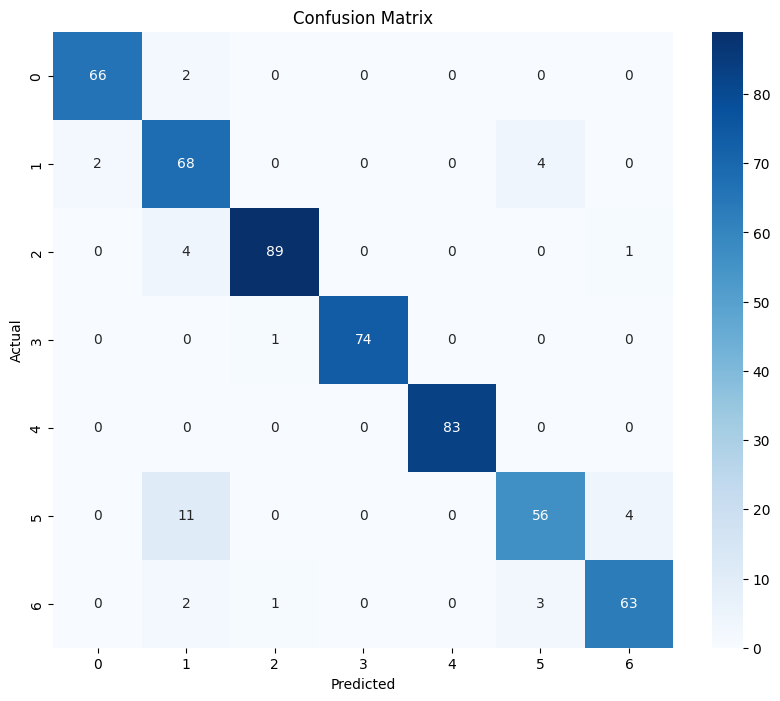

In [56]:
# Visualisasi confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()